In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import cartopy.crs as ccrs
def plot_maps(ds,colmap='RdBu_r',vlim=(-0.01,0.01),axes=111,**kwargs):
    crs = ccrs.Robinson()
    #fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(axes,projection=crs)
    ds.plot(vmax=vlim[1],vmin=vlim[0],y='lat_bins',ax=ax,
            transform=ccrs.PlateCarree(),cmap=colmap,label=False,**kwargs,
           cbar_kwargs={'fraction':0.02})
    ax.gridlines(draw_labels=True)
    return fig,ax

In [3]:
#root_path = '/home/datawork-lops-osi/equinox/jetn/'
root_path = '/Users/zcaspar/codes/mit4320/'
file_spectra = root_path+'sd_band_dl1.0.nc'
file_demod = root_path +'energy_hf_binned_dl1.0.nc'

In [4]:
ds_demod = xr.open_dataset(file_demod).rename({'lat_bin':'lat_bins','lon_bin':'lon_bins'})
ds_spectra = xr.open_dataset(file_spectra)
ds_spectra

<xarray.Dataset>
Dimensions:         (frequency_band: 14, lon_bins: 359, lat_bins: 119)
Coordinates:
  * frequency_band  (frequency_band) object 'total' 'low' ... 'inertial_0dot4'
  * lat_bins        (lat_bins) float64 -59.5 -58.5 -57.5 ... 56.5 57.5 58.5
  * lon_bins        (lon_bins) float64 -179.5 -178.5 -177.5 ... 177.5 178.5
Data variables:
    E_Eulerian      (frequency_band, lon_bins, lat_bins) float64 ...
    E_Lagrangian    (frequency_band, lon_bins, lat_bins) float64 ...
    E_depth         (lon_bins, lat_bins) float64 ...

In [5]:
ds_demod = ds_demod.where(ds_demod.waterdepth>500)

Text(0.5, 1.0, 'Eulerian semidiurnal energy ratio (spectra/demodulated, 1°x1° bins)')

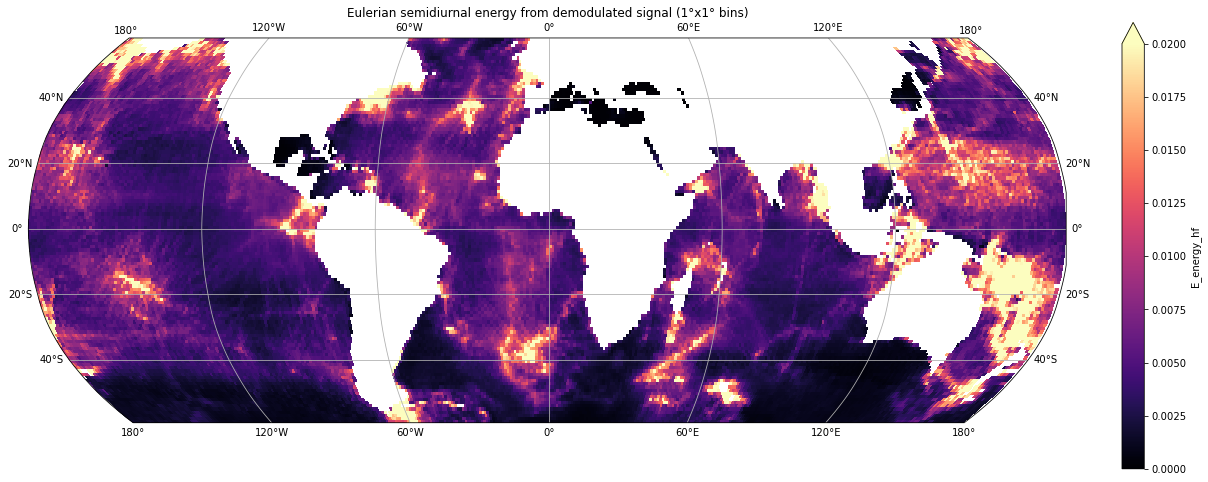

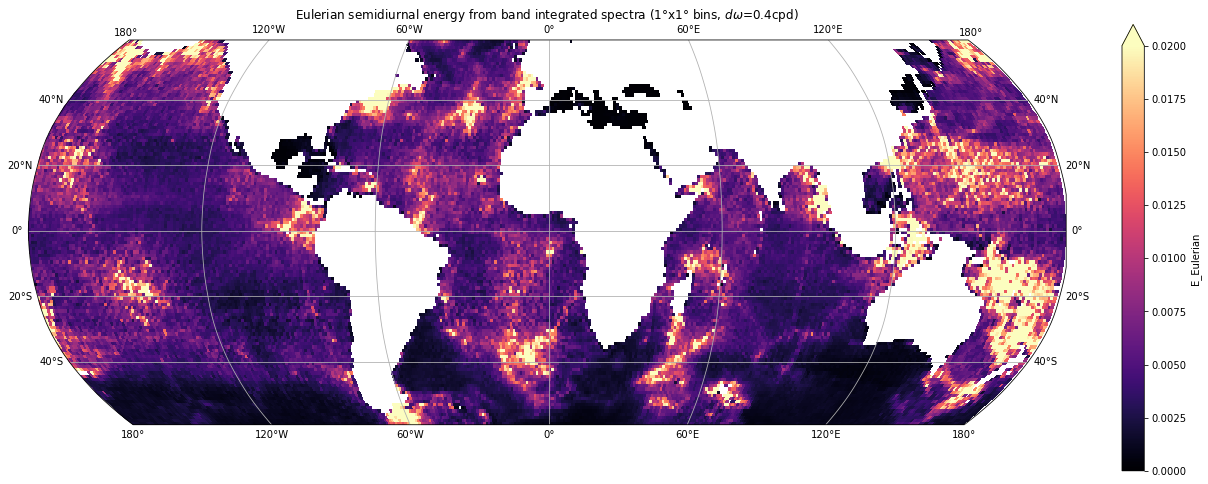

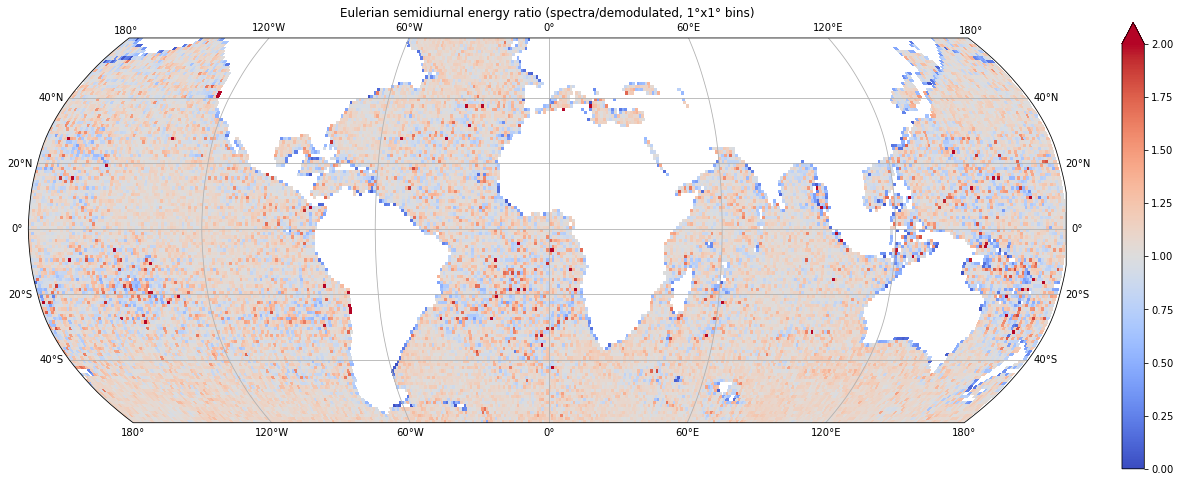

In [6]:
figsize=(20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_demod.E_energy_hf,colmap='magma',vlim=(0,0.02))
ax.set_title('Eulerian semidiurnal energy from demodulated signal (1°x1° bins)')

fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_spectra.sel(frequency_band='semidiurnal_0dot2').E_Eulerian,colmap='magma',vlim=(0,0.02))
ax.set_title(r'Eulerian semidiurnal energy from band integrated spectra (1°x1° bins, $d\omega$=0.4cpd)')

fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_spectra.sel(frequency_band='semidiurnal_0dot2').E_Eulerian/ds_demod.E_energy_hf,
          colmap='coolwarm',vlim=(0,2))
ax.set_title('Eulerian semidiurnal energy ratio (spectra/demodulated, 1°x1° bins)')

Text(0.5, 1.0, 'Lagrangian semidiurnal energy ratio (spectra/demodulated, 1°x1° bins)')

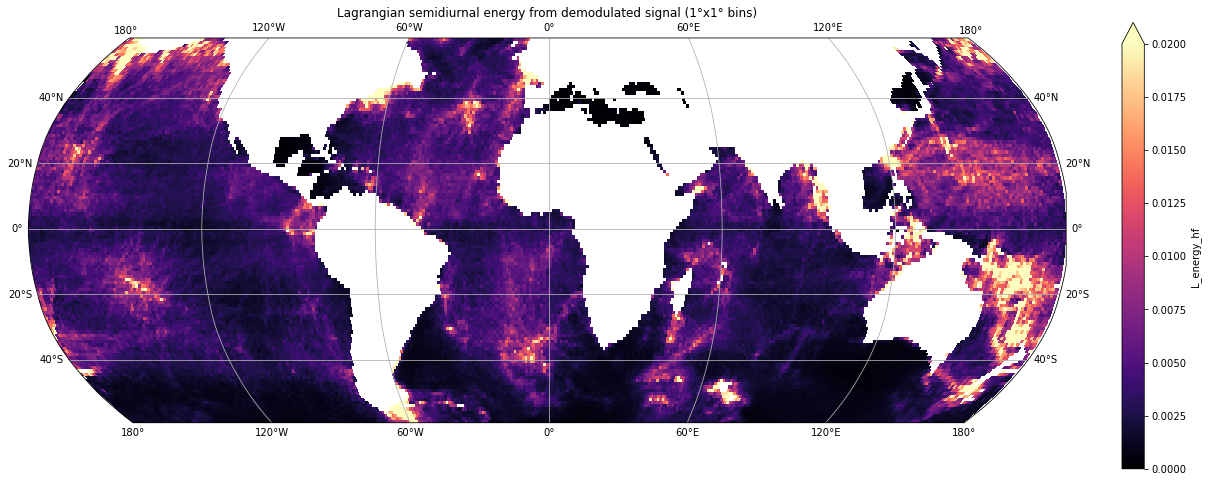

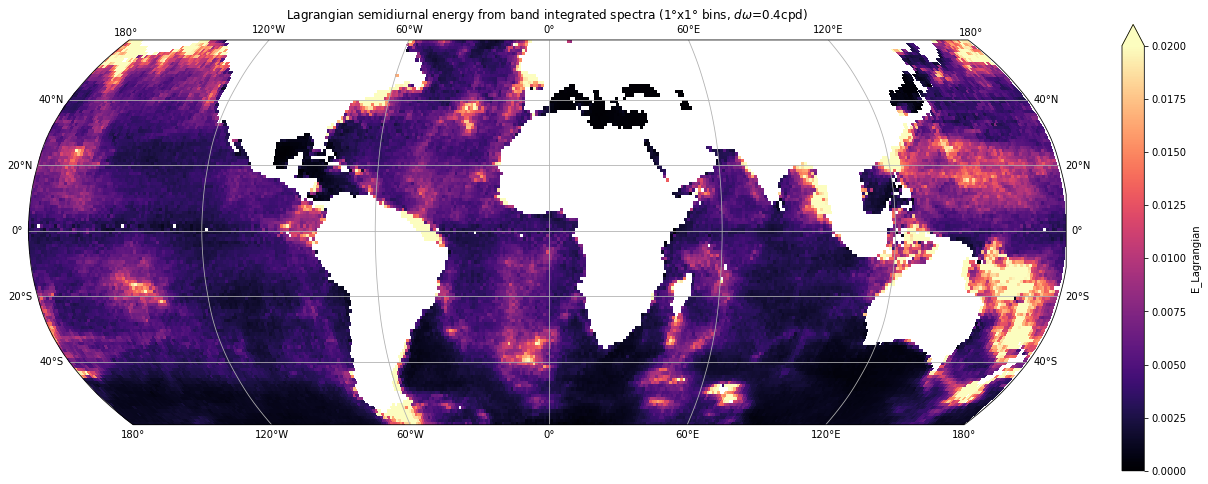

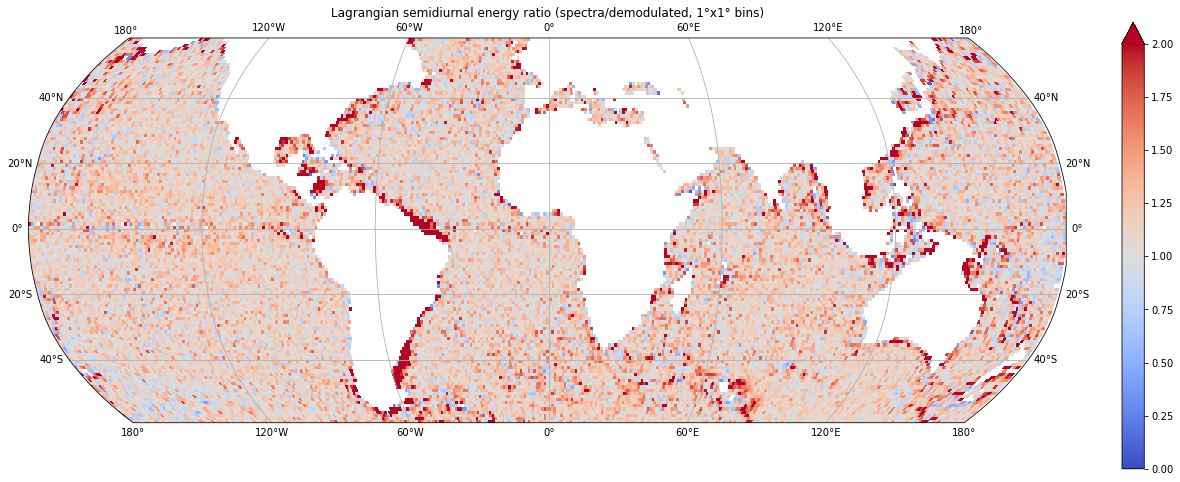

In [7]:
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_demod.L_energy_hf,colmap='magma',vlim=(0,0.02))
ax.set_title('Lagrangian semidiurnal energy from demodulated signal (1°x1° bins)')

fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_spectra.sel(frequency_band='semidiurnal_0dot2').E_Lagrangian,colmap='magma',vlim=(0,0.02))
ax.set_title(r'Lagrangian semidiurnal energy from band integrated spectra (1°x1° bins, $d\omega$=0.4cpd)')

fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_spectra.sel(frequency_band='semidiurnal_0dot2').E_Lagrangian/ds_demod.L_energy_hf,
          colmap='coolwarm',vlim=(0,2))
ax.set_title('Lagrangian semidiurnal energy ratio (spectra/demodulated, 1°x1° bins)')

Text(0.5, 1.0, 'Lagrangian over Eulerian energy (spectra)')

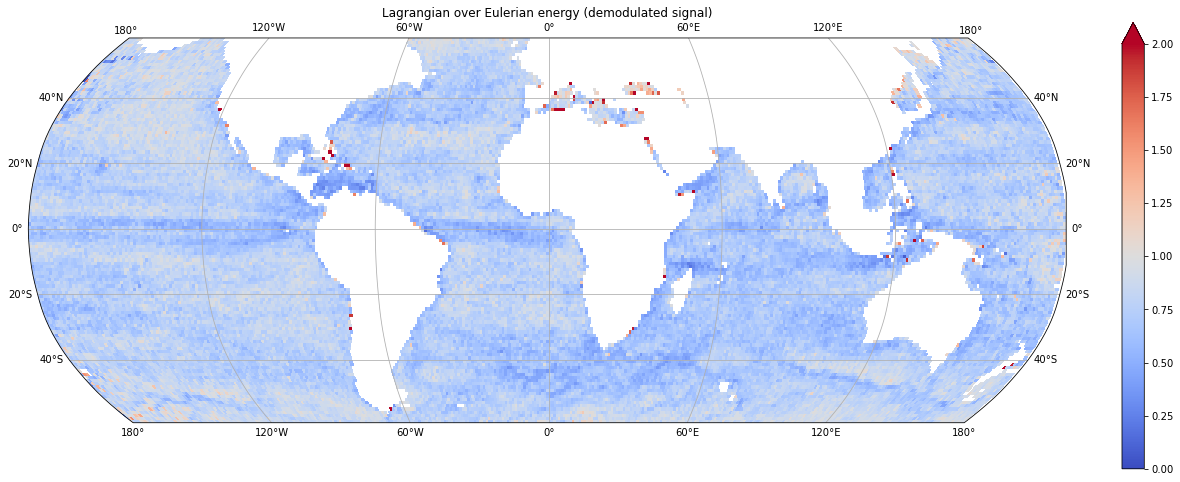

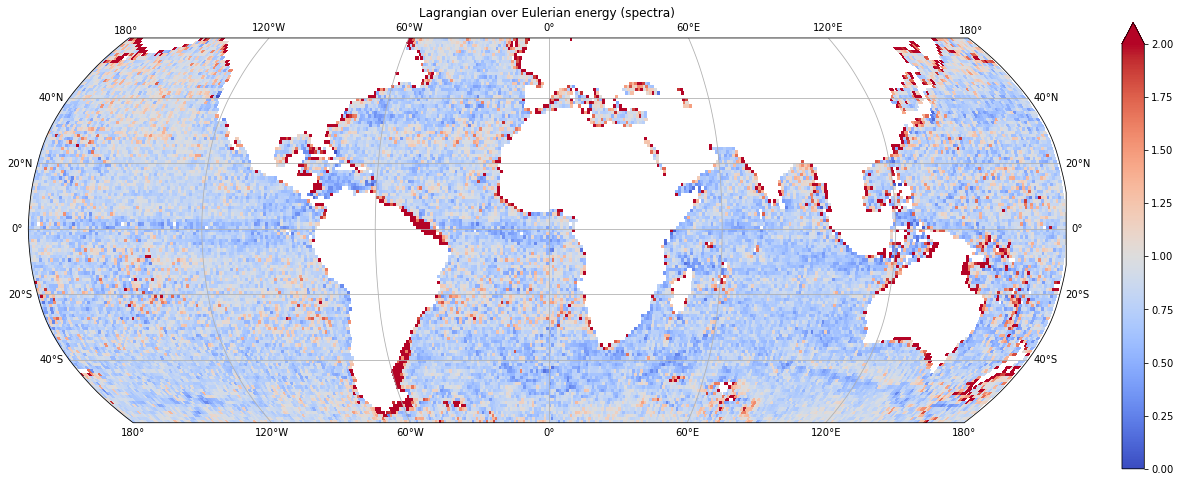

In [8]:
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps((ds_demod.L_energy_hf/ds_demod.E_energy_hf),colmap='coolwarm',vlim=(0,2))
ax.set_title('Lagrangian over Eulerian energy (demodulated signal)')
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps((ds_spectra.E_Lagrangian/ds_spectra.E_Eulerian).sel(frequency_band='semidiurnal_0dot2'),
          colmap='coolwarm',vlim=(0,2))
ax.set_title('Lagrangian over Eulerian energy (spectra)')

Text(0.5, 1.0, 'Lagrangian - Eulerian (spectra)')

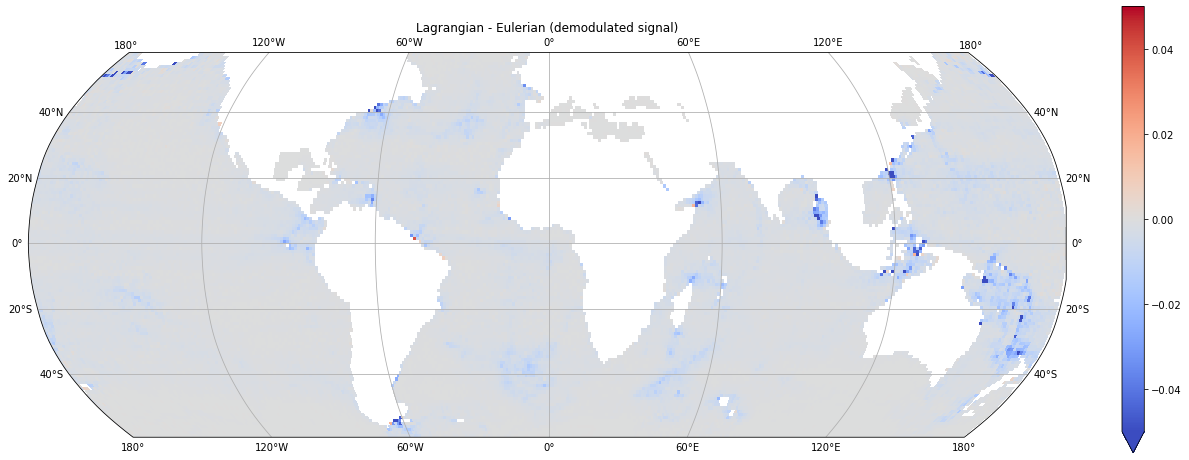

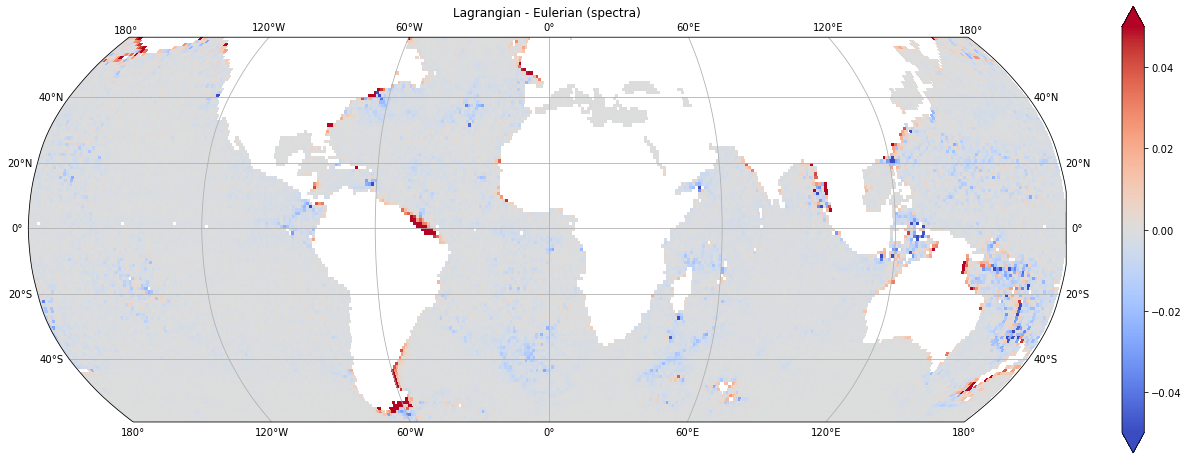

In [10]:
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps((ds_demod.L_energy_hf-ds_demod.E_energy_hf),colmap='coolwarm',vlim=(-0.05,0.05))
ax.set_title('Lagrangian - Eulerian (demodulated signal)')
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps((ds_spectra.E_Lagrangian-ds_spectra.E_Eulerian).sel(frequency_band='semidiurnal_0dot2'),
          colmap='coolwarm',vlim=(-0.05,0.05))
ax.set_title('Lagrangian - Eulerian (spectra)')

(<Figure size 1440x1440 with 2 Axes>,
 <GeoAxesSubplot:xlabel='lon_bins', ylabel='lat_bins'>)

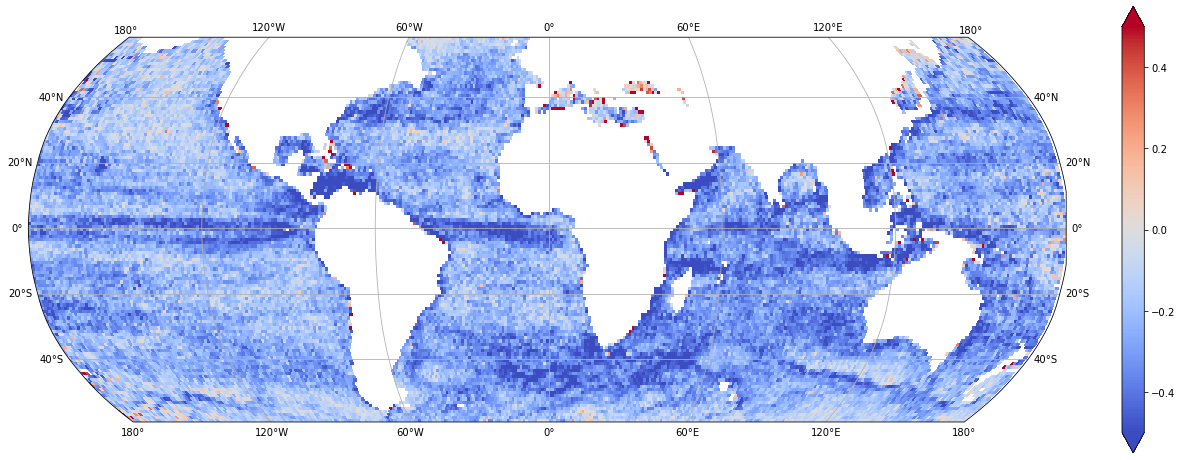

In [24]:
fig = plt.figure(figsize=(20,20))

plot_maps((ds_demod.L_energy_hf-ds_demod.E_energy_hf)/ds_demod.E_energy_hf
          ,colmap='coolwarm',vlim=(-0.5,0.5))

In [39]:
ds = xr.merge([ds_spectra,ds_demod])
ds

<xarray.Dataset>
Dimensions:         (frequency_band: 14, lon_bins: 359, lat_bins: 119)
Coordinates:
  * frequency_band  (frequency_band) object 'total' 'low' ... 'inertial_0dot4'
  * lat_bins        (lat_bins) float64 -59.5 -58.5 -57.5 ... 56.5 57.5 58.5
  * lon_bins        (lon_bins) float64 -179.5 -178.5 -177.5 ... 177.5 178.5
Data variables:
    E_Eulerian      (frequency_band, lon_bins, lat_bins) float64 ...
    E_Lagrangian    (frequency_band, lon_bins, lat_bins) float64 ...
    E_depth         (lon_bins, lat_bins) float64 4.548e+03 ... 3.74e+03
    E_count         (lon_bins, lat_bins) float64 288.0 276.0 ... 252.0 251.0
    E_energy_hf     (lon_bins, lat_bins) float64 0.001762 0.001286 ... 0.02979
    L_energy_hf     (lon_bins, lat_bins) float64 0.001845 0.0008099 ... 0.0302
    waterdepth      (lon_bins, lat_bins) float64 4.347e+03 ... 3.745e+03
    L_count         (lon_bins, lat_bins) float64 217.0 215.0 ... 2.066e+03

In [40]:
import seaborn as sns

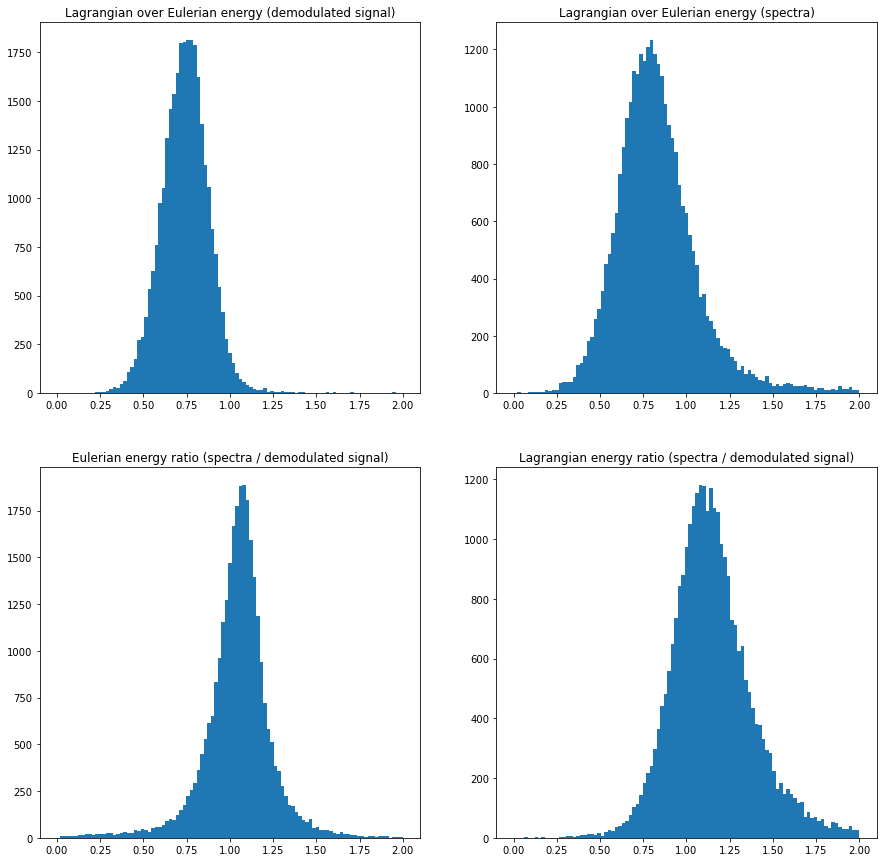

In [44]:
bins = np.linspace(0,2,100)
fig,axes = plt.subplots(2,2,figsize=(15,15))
_ = (ds_demod.L_energy_hf/ds_demod.E_energy_hf).plot.hist(bins=bins,ax=axes[0,0])
_ = (ds_spectra.E_Lagrangian/ds_spectra.E_Eulerian).sel(frequency_band='semidiurnal_0dot2'
                                                       ).plot.hist(bins=bins,ax=axes[0,1])
_ = (ds_spectra.E_Eulerian.sel(frequency_band='semidiurnal_0dot2')/ds_demod.E_energy_hf).plot.hist(bins=bins,
                                                                                                   ax=axes[1,0])
_ = (ds_spectra.E_Lagrangian.sel(frequency_band='semidiurnal_0dot2')/ds_demod.L_energy_hf
    ).plot.hist(bins=bins,ax=axes[1,1])
axes[0,0].set_title('Lagrangian over Eulerian energy (demodulated signal)');
axes[0,1].set_title('Lagrangian over Eulerian energy (spectra)');
axes[1,0].set_title('Eulerian energy ratio (spectra / demodulated signal)');
axes[1,1].set_title('Lagrangian energy ratio (spectra / demodulated signal)');

Text(0.5, 1.0, 'Lagrangian semidiurnal energy ratio (spectra/demodulated, 1°x1° bins)')

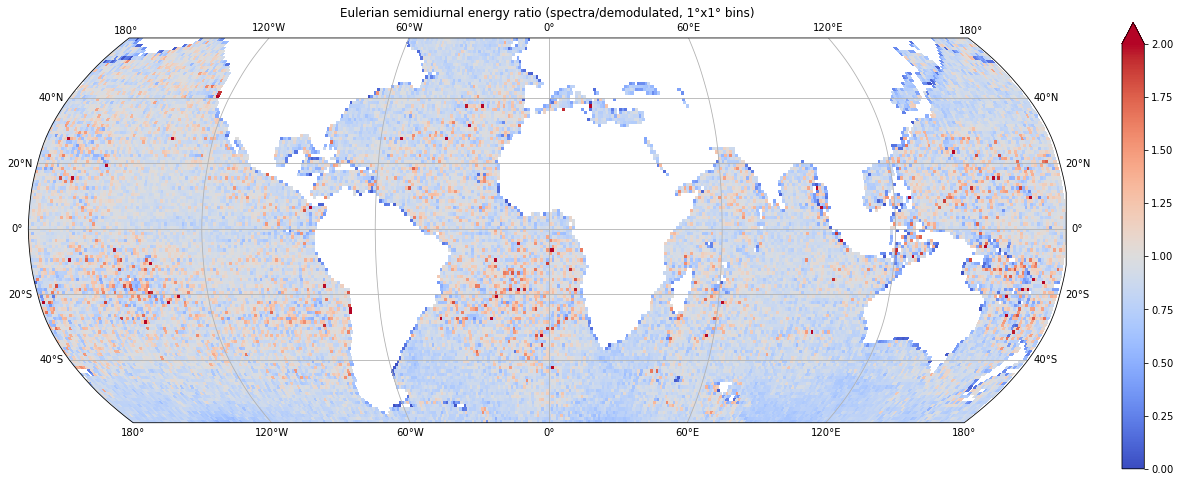

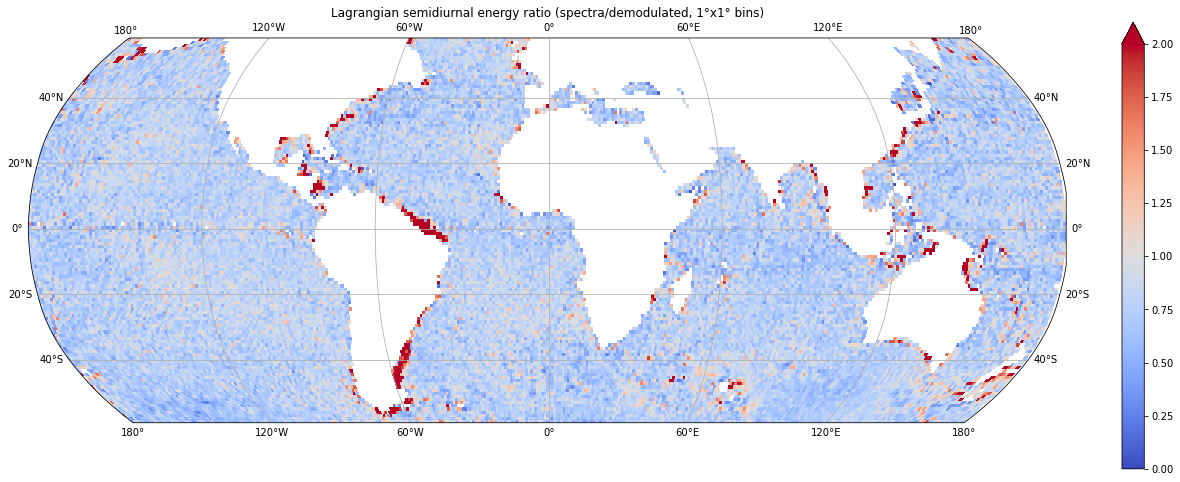

In [20]:
cmap='coolwarm'
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_spectra.sel(frequency_band='semidiurnal_0dot1').E_Eulerian/ds_demod.E_energy_hf,
          colmap=cmap,vlim=(0,2))
ax.set_title('Eulerian semidiurnal energy ratio (spectra/demodulated, 1°x1° bins)')

fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_spectra.sel(frequency_band='semidiurnal_0dot1').E_Lagrangian/ds_demod.L_energy_hf,
          colmap=cmap,vlim=(0,2))
ax.set_title('Lagrangian semidiurnal energy ratio (spectra/demodulated, 1°x1° bins)')

Text(0.5, 1.0, 'Lagrangian semidiurnal energy ratio (spectra/demodulated, 1°x1° bins)')

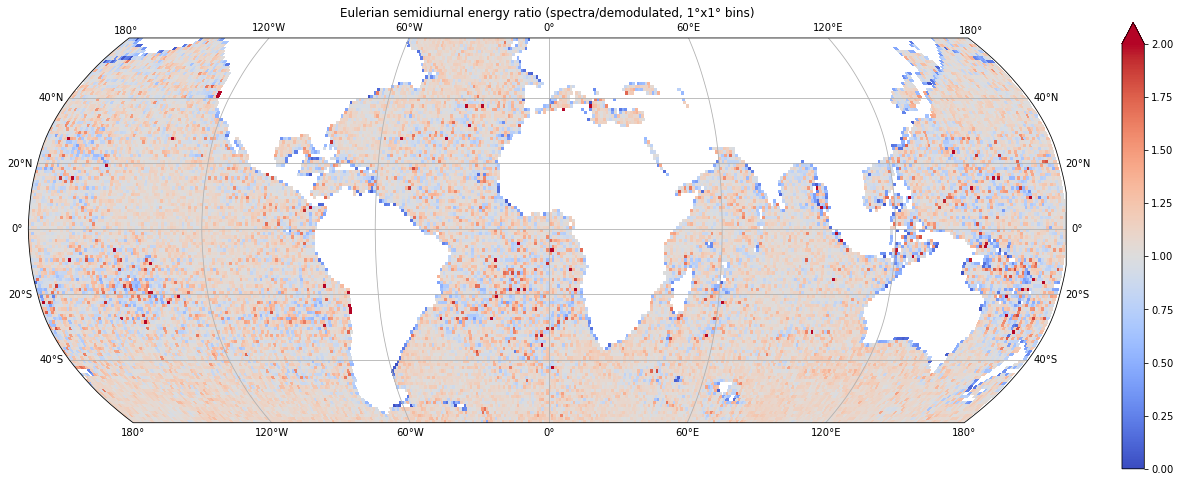

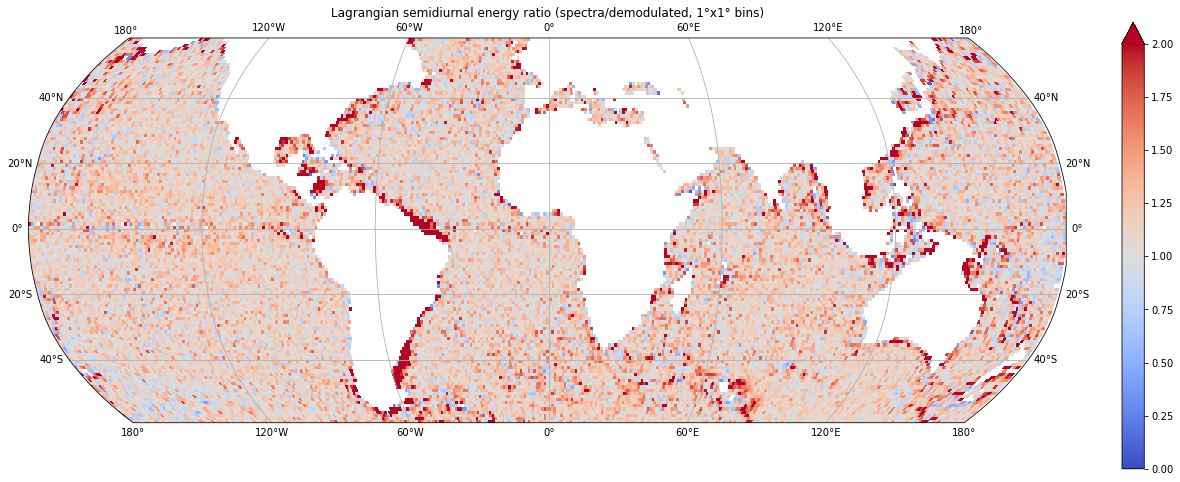

In [21]:
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_spectra.sel(frequency_band='semidiurnal_0dot2').E_Eulerian/ds_demod.E_energy_hf,
          colmap=cmap,vlim=(0,2))
ax.set_title('Eulerian semidiurnal energy ratio (spectra/demodulated, 1°x1° bins)')

fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_spectra.sel(frequency_band='semidiurnal_0dot2').E_Lagrangian/ds_demod.L_energy_hf,
          colmap=cmap,vlim=(0,2))
ax.set_title('Lagrangian semidiurnal energy ratio (spectra/demodulated, 1°x1° bins)')

Text(0.5, 1.0, 'Lagrangian semidiurnal energy ratio (spectra/demodulated, 1°x1° bins)')

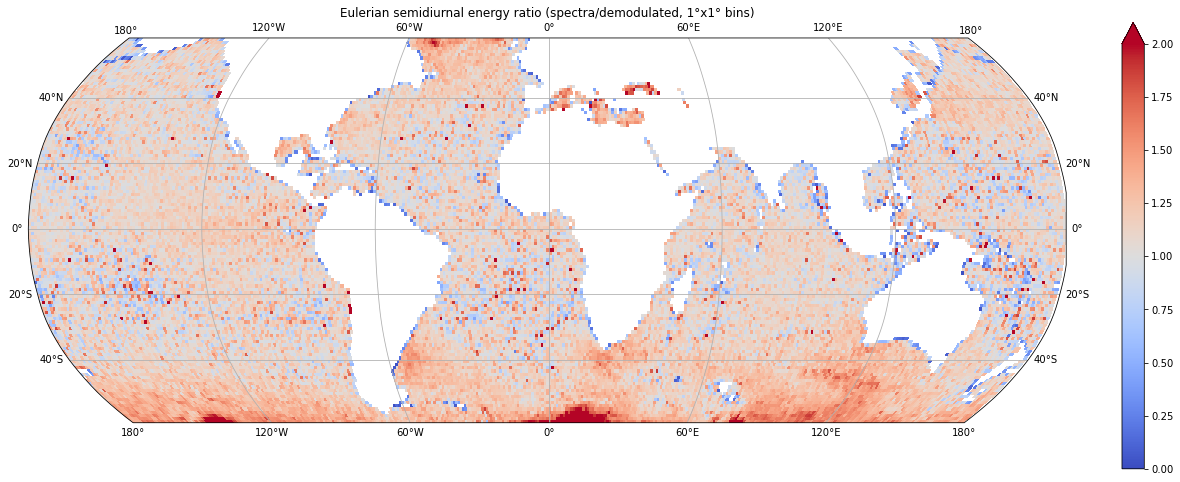

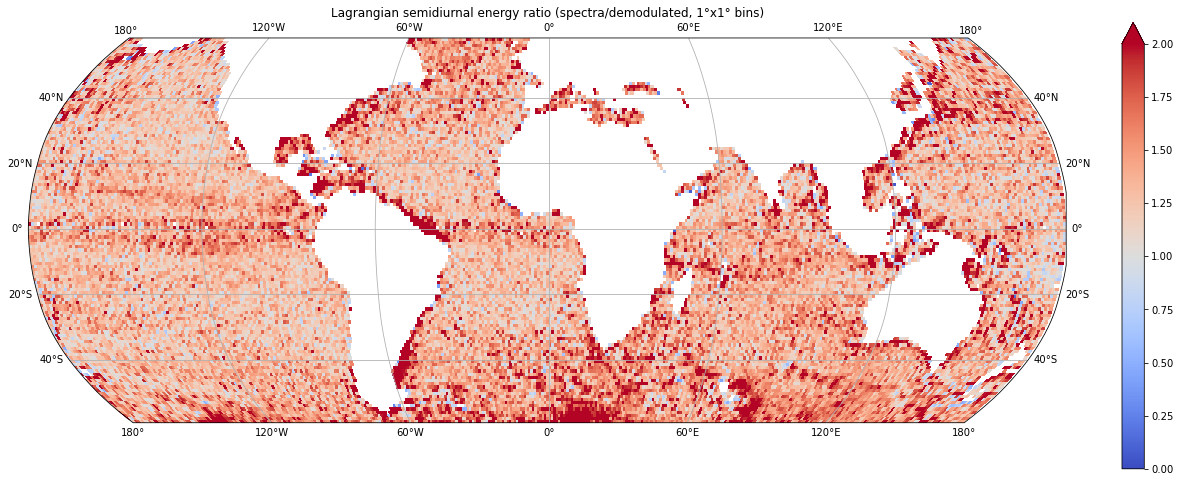

In [22]:
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_spectra.sel(frequency_band='semidiurnal_0dot3').E_Eulerian/ds_demod.E_energy_hf,
          colmap=cmap,vlim=(0,2))
ax.set_title('Eulerian semidiurnal energy ratio (spectra/demodulated, 1°x1° bins)')

fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_spectra.sel(frequency_band='semidiurnal_0dot3').E_Lagrangian/ds_demod.L_energy_hf,
          colmap=cmap,vlim=(0,2))
ax.set_title('Lagrangian semidiurnal energy ratio (spectra/demodulated, 1°x1° bins)')